In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
Datadir = "./People"
CATEGORIES = ["Women_Smile","Women_Not_Smile","Man_Not_Smile","Man_Smile"]


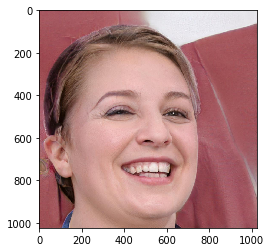

In [51]:
for categories in CATEGORIES:
    path = os.path.join(Datadir,categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(RGB_img, (IMG_SIZE, IMG_SIZE))
        plt.imshow(RGB_img)
        break
    break

In [58]:
new_array.shape

(100, 100, 3)

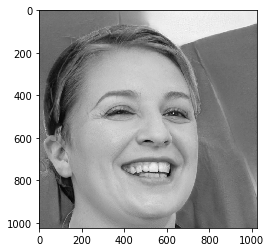

In [10]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
new_array1 = cv2.resize(new_array, (1024,1024))
for categories in CATEGORIES:
    path = os.path.join(Datadir,categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        break
    break

# cv2.imwrite("./dogtest/watch/100.jpg",new_array1)


In [6]:
IMG_SIZE = 100

In [7]:
new_array[0]

array([116, 106, 111, 109, 109, 110, 107, 109, 107, 107, 108, 105, 108,
       108, 109, 112, 111, 113, 111, 111, 114, 111, 111, 114, 113, 108,
       111, 113, 116, 117, 118, 120, 121, 121, 127, 128, 127, 129, 137,
       137, 135, 141, 146, 148, 151, 155, 165, 178, 191, 206, 217, 222,
       225, 228, 228, 231, 230, 231, 234, 235, 234, 236, 234, 238, 235,
       236, 235, 236, 236, 236, 237, 236, 236, 235, 237, 235, 235, 236,
       234, 234, 233, 233, 232, 232, 232, 231, 232, 231, 232, 233, 230,
       231, 230, 231, 232, 231, 229, 229, 229, 229], dtype=uint8)

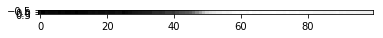

In [8]:
plt.imshow(new_array[0:1],cmap="gray")

In [60]:
training_data = []
def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(Datadir,categories)
        if categories == "Man_Not_Smile" or categories == "Man_Smile":
            class_num = 0
        else:
            class_num = 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(RGB_img, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [61]:
create_training_data()

In [62]:
print(len(training_data))

6779


In [63]:
import random
random.shuffle(training_data)

In [64]:
for x in training_data[0:10]:
    print(x[1])

1
1
0
1
0
1
0
1
0
0


In [83]:
X = []
y = []

In [84]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [85]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array(y)

In [86]:
import pickle

In [97]:
X.shape

(6779, 100, 100, 3)

In [88]:
np.save("features-color.npy",X)
np.save("label-color.npy",y)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [129]:
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (5084, 10000)
Testing Shape: (1695, 10000)


In [130]:
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (5084, 10000)
Training Data Labels Shape: (5084,)


In [131]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [132]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Kanwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
y_train[:20]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [134]:
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [167]:
model = Sequential()

In [162]:
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [163]:
X_train

array([[[[0.98823529],
         [0.98823529],
         [0.99607843],
         ...,
         [0.88627451],
         [0.8627451 ],
         [0.8745098 ]],

        [[0.98431373],
         [0.99215686],
         [0.98823529],
         ...,
         [0.83137255],
         [0.83137255],
         [0.81960784]],

        [[0.98823529],
         [0.99215686],
         [0.99215686],
         ...,
         [0.79215686],
         [0.78039216],
         [0.78823529]],

        ...,

        [[0.54117647],
         [0.51372549],
         [0.54509804],
         ...,
         [0.79215686],
         [0.74117647],
         [0.77647059]],

        [[0.41176471],
         [0.52156863],
         [0.50980392],
         ...,
         [0.71372549],
         [0.7254902 ],
         [0.78431373]],

        [[0.52941176],
         [0.48235294],
         [0.53333333],
         ...,
         [0.6627451 ],
         [0.66666667],
         [0.64705882]]],


       [[[0.5254902 ],
         [0.51764706],
         [0.52

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [168]:
X = X/255.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [169]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
activation_10 (Activation)   (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_11 (Activation)   (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 33856)           

In [171]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

ValueError: A target array with shape (5084, 2) was passed for an output of shape (None, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [120]:
model.save("Male_vs_Female-2.h5")

In [155]:
X_train.shape

(5084, 10000)

In [156]:
y_train.shape

(5084, 2)